In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import tensorflow as tf
from tensorflow.keras import utils, layers, models
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
!unzip /content/drive/MyDrive/Fruits_Vegetables_Recognition/data.zip -d /content/

Archive:  /content/drive/MyDrive/Fruits_Vegetables_Recognition/data.zip
  inflating: /content/test/apple/Image_1.jpg  
  inflating: /content/test/apple/Image_10.jpg  
  inflating: /content/test/apple/Image_2.jpg  
  inflating: /content/test/apple/Image_3.jpg  
  inflating: /content/test/apple/Image_4.jpg  
  inflating: /content/test/apple/Image_5.jpg  
  inflating: /content/test/apple/Image_6.JPG  
  inflating: /content/test/apple/Image_7.jpg  
  inflating: /content/test/apple/Image_8.jpg  
  inflating: /content/test/apple/Image_9.jpg  
  inflating: /content/test/banana/Image_1.jpg  
  inflating: /content/test/banana/Image_10.jpg  
  inflating: /content/test/banana/Image_2.jpg  
  inflating: /content/test/banana/Image_3.jpg  
  inflating: /content/test/banana/Image_4.jpg  
  inflating: /content/test/banana/Image_5.jpg  
  inflating: /content/test/banana/Image_6.jpg  
  inflating: /content/test/banana/Image_8.jpg  
  inflating: /content/test/banana/Image_9.jpg  
  inflating: /content/te

In [3]:
training_set = utils.image_dataset_from_directory(
    "/content/train",
    labels="inferred",
    label_mode="categorical",
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    interpolation="bilinear"
)

validation_set = utils.image_dataset_from_directory(
    "/content/validation",
    labels="inferred",
    label_mode="categorical",
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    interpolation="bilinear"
)

Found 3115 files belonging to 36 classes.
Found 351 files belonging to 36 classes.


In [4]:
normalization_layer = layers.Rescaling(1./255)

training_data = training_set.map(lambda x, y: (normalization_layer(x), y))
validation_data = validation_set.map(lambda x, y: (normalization_layer(x), y))

In [5]:
model = models.Sequential()
model.add(layers.Input(shape=(64, 64, 3)))

model.add(layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
model.add(layers.MaxPool2D(pool_size=2, strides=2))

model.add(layers.Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
model.add(layers.Conv2D(filters=128, kernel_size=3, activation='relu'))
model.add(layers.MaxPool2D(pool_size=2, strides=2))
model.add(layers.Dropout(0.5))

model.add(layers.Flatten())
model.add(layers.Dense(units=256, activation='relu'))
model.add(layers.Dense(units=128, activation='relu'))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(units=36,activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 64, 64, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 62, 62, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 31, 31, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 29, 29, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     6,422,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 36)             │         4,644 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,720,484 (25.64 MB)

 Trainable params: 6,720,484 (25.64 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
callbacks = [
    EarlyStopping(patience=10, restore_best_weights=True),
    ModelCheckpoint("best_model.keras", save_best_only=True)
]

training_history = model.fit(
    training_data,
    validation_data=validation_data,
    epochs=30,
    callbacks=callbacks
)

Epoch 1/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 69s 614ms/step - accuracy: 0.0281 - loss: 3.5768 - val_accuracy: 0.0598 - val_loss: 3.3661
Epoch 2/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 72s 584ms/step - accuracy: 0.0544 - loss: 3.3679 - val_accuracy: 0.0912 - val_loss: 3.1109
Epoch 3/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 57s 581ms/step - accuracy: 0.0620 - loss: 3.2485 - val_accuracy: 0.1567 - val_loss: 2.9965
Epoch 4/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 58s 597ms/step - accuracy: 0.1106 - loss: 3.0595 - val_accuracy: 0.2621 - val_loss: 2.6469
Epoch 5/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 79s 562ms/step - accuracy: 0.1547 - loss: 2.8978 - val_accuracy: 0.2991 - val_loss: 2.2941
Epoch 6/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 84s 583ms/step - accuracy: 0.1896 - loss: 2.6967 - val_accuracy: 0.4103 - val_loss: 1.9511
Epoch 7/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 82s 582ms/step - accuracy: 0.2372 - loss: 2.4725 - val_accuracy: 0.4644 - val_loss: 1.8175
Epoch 8/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 82s 587ms/step - accuracy: 0.2805 - loss: 2.3256 - val_accu

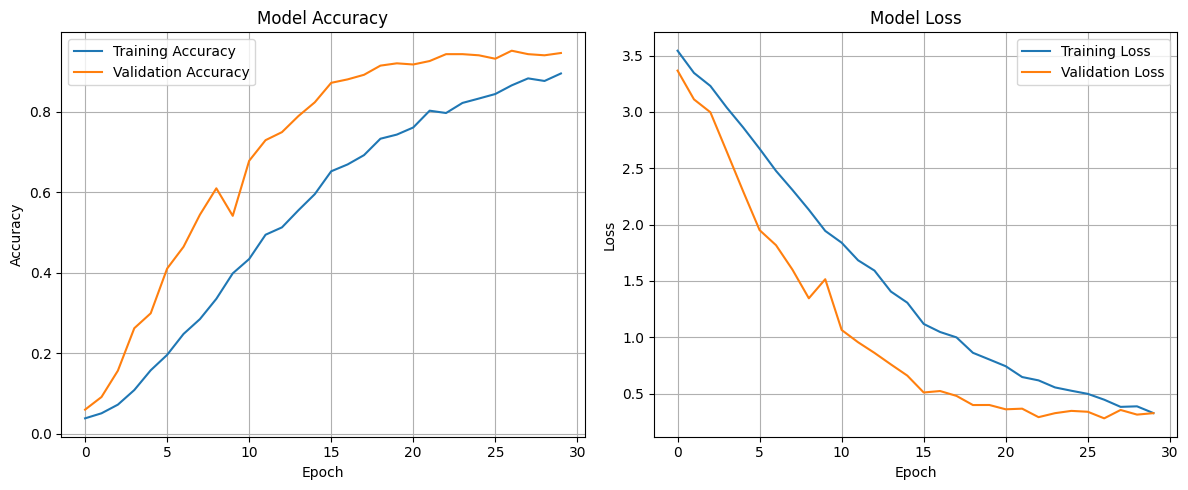

In [7]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(training_history.history['accuracy'], label='Training Accuracy')
plt.plot(training_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(training_history.history['loss'], label='Training Loss')
plt.plot(training_history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()